In [1]:
import numpy as np
import pandas as pd 
from scipy.stats import norm,t
import matplotlib.pyplot as plt

# Q1

## 1.1

In [2]:
def getClass1Prop(x, r):
    
    x = np.array(x)
    dist = np.zeros(len(x_train))
    for i in range(len(x_train)):
        dist[i] = np.linalg.norm(x-x_train[i])
    dist_label_1 = dist[y_train==1]
    dist_1r = dist_label_1[dist_label_1<=r] 
    if len(dist[dist<=r]):
        return len(dist_1r)/len(dist[dist<=r])
    else:
        return np.nan

## 1.2

In [3]:
def computeMisVal(data_val, r):
    x_val = data_val.iloc[:,1:3].to_numpy()
    y_val = data_val['Y'].to_numpy()
    y_pred = np.zeros(len(y_val))
    for i in range(len(x_val)):
        p = getClass1Prop(x_val[i],r)
        y_pred[i] = 1 if p>=0.5 else 0
    
    mis = (len(y_val)-(y_pred==y_val).sum())/len(y_val)
    
    return mis
        

## 1.3

In [4]:
data = pd.read_csv('SML.NN.data.csv')
data_train = data[data['set']=='train']
data_val = data[data['set']=='valid']
data_test= data[data['set']=='test']
x_train = data_train.iloc[:,1:3].to_numpy()
y_train = data_train['Y'].to_numpy()
x_val = data_val.iloc[:,1:3].to_numpy()
y_val = data_val['Y'].to_numpy()

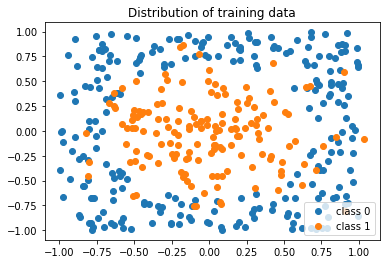

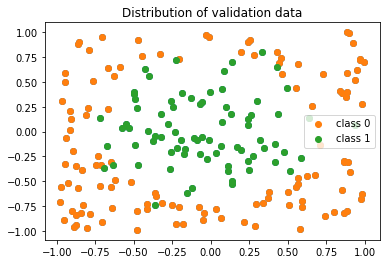

In [5]:
plt.figure()
plt.scatter(x_train[y_train==0][:,0],x_train[y_train==0][:,1],label = "class 0")
plt.scatter(x_train[y_train==1][:,0],x_train[y_train==1][:,1],label = "class 1")
plt.legend()
plt.title('Distribution of training data')
plt.show()
plt.figure()
plt.scatter(x_val[:,0],x_val[:,1])
plt.scatter(x_val[y_val==0][:,0],x_val[y_val==0][:,1],label = "class 0")
plt.scatter(x_val[y_val==1][:,0],x_val[y_val==1][:,1],label = "class 1")
plt.legend()
plt.title('Distribution of validation data')
plt.show()

**The distributions of training and validation set show that points in class 1 mainly locate at center while points in class 0 form the outer circle. A good value of r should be able to differentiate two classes. The radius of points in class 1 is roughly 0.25. So r = 0.25 would be my guess.**

## 1.4

In [6]:
def computeMisTest(data_test, r):
    x_test = data_test.iloc[:,1:3].to_numpy()
    y_test = data_test['Y'].to_numpy()
    y_pred = np.zeros(len(y_test))
    for i in range(len(x_test)):
        p = getClass1Prop(x_test[i],r)
        y_pred[i] = 1 if p>=0.5 else 0
    
    mis = (len(y_test)-(y_pred==y_test).sum())/len(y_test)
    
    return mis

In [7]:
data = pd.read_csv('SML.NN.data.csv')
data_train = data[data['set']=='train']
data_val = data[data['set']=='valid']
data_test= data[data['set']=='test']
x_train = data_train.iloc[:,1:3].to_numpy()
y_train = data_train['Y'].to_numpy()
r_grid = np.arange(0.01,1.01,0.01)
mis_total = []

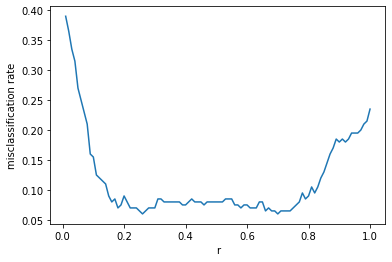

When r = 0.26, the model achieves the lowest misclassification rate as 0.06


In [8]:
for i in r_grid:
    mis_total.append(computeMisVal(data_val, i))
    
plt.figure()
plt.plot(r_grid,mis_total)
plt.xlabel('r')
plt.ylabel('misclassification rate')
plt.show()
rs = r_grid[np.argmin(mis_total)]
print(f"When r = {rs}, the model achieves the lowest misclassification rate as {mis_total[np.argmin(mis_total)]}")

In [9]:
mis_test = computeMisTest(data_test, rs)
mis_test_gs = computeMisTest(data_test, 0.25)
print(f"When r = {rs}, the misclassification rate on test data is {mis_test}")
print(f"When r = {0.25}, the misclassification rate on test data is {mis_test_gs}")

When r = 0.26, the misclassification rate on test data is 0.045
When r = 0.25, the misclassification rate on test data is 0.05


**0.25 is our guess value of r, 0.26 is the value chosen based on experiments. The results show our guess is very close to the optimal value of r**

# Q2

## 2.1

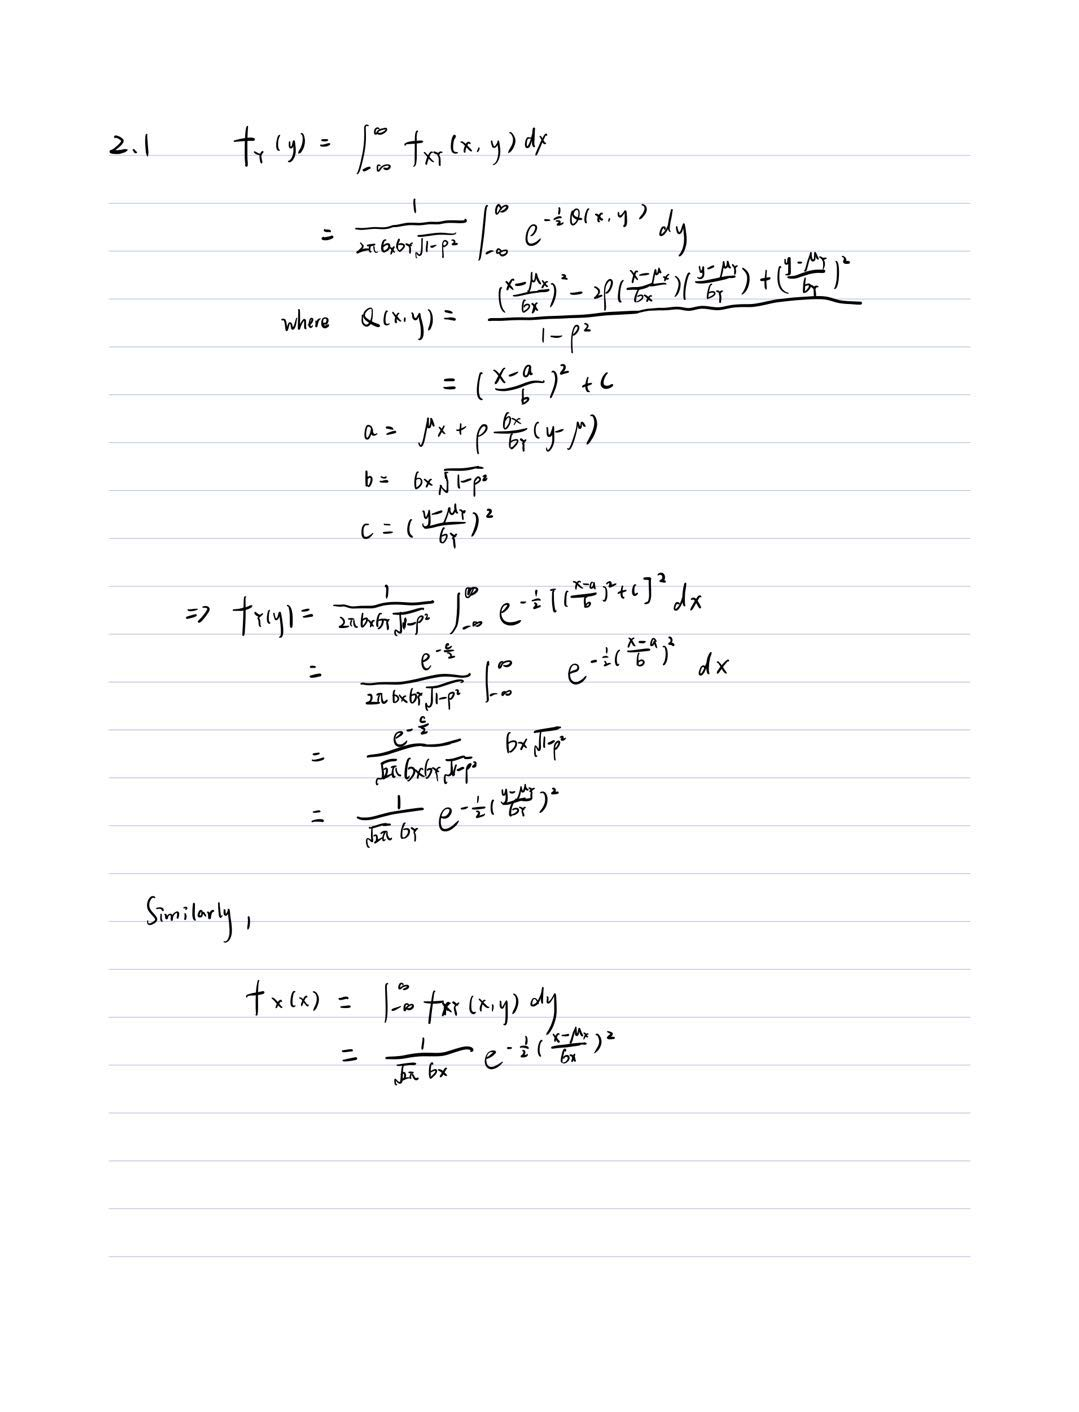

In [10]:
from IPython.display import Image
Image('2_1.jpg')

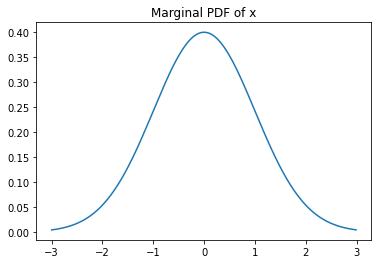

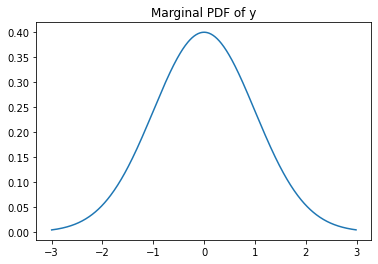

In [11]:
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
  
# Calculating mean and standard deviation
mu_x,mu_y,sig_x,sig_y = 0,0,1,1
  
plt.figure()
plt.plot(x, norm.pdf(x, mu_x, sig_x))
plt.title('Marginal PDF of x')
plt.show()
plt.figure()
plt.plot(y, norm.pdf(y, mu_y, sig_y))
plt.title('Marginal PDF of y')
plt.show()

**Those marginal pdfs are identical with Normal(0,1) pdf**

## 2.2

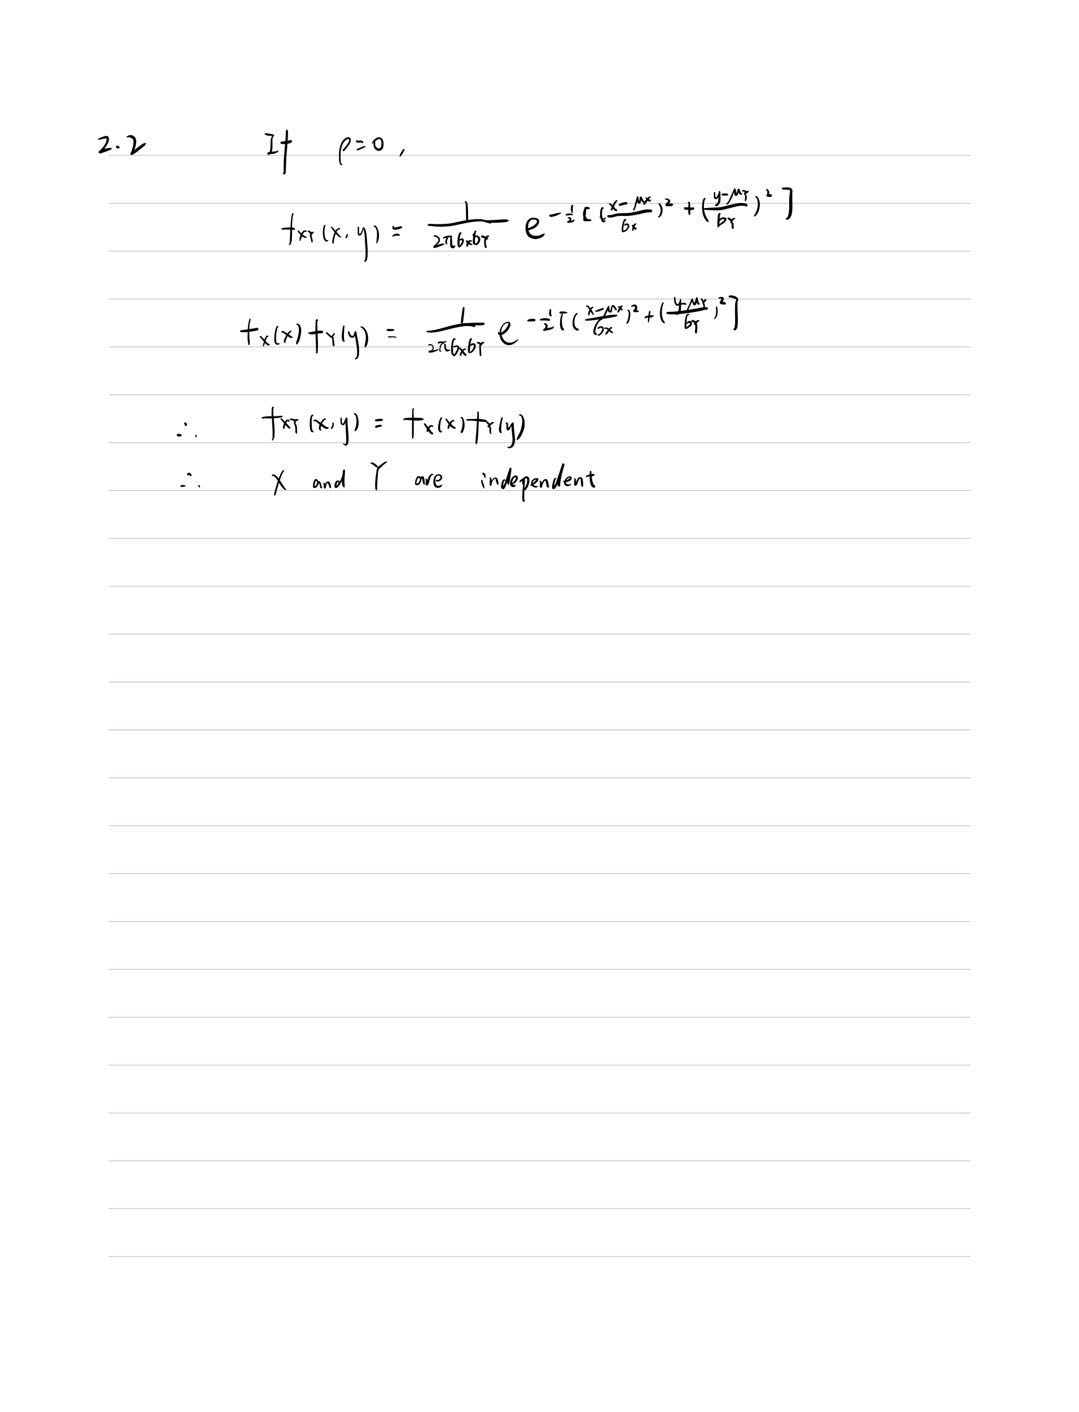

In [12]:
Image('2_2.jpg')

## 2.3

Given $Y=1$:

$E[X|Y=1]=\mu_x+\rho\sigma_x\frac{1-\mu_y}{\sigma_y}\$

$Var[X|Y=1]=(1-\rho^2)\sigma_x^2$

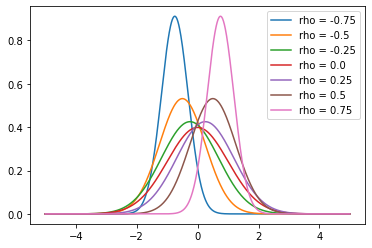

In [13]:
rho_grid = np.arange(-0.75,1,0.25)
x = np.arange(-5, 5, 0.01)
mu_x,mu_y,sig_x,sig_y = 0,0,1,1
plt.figure()
for rho in rho_grid:
    mu = mu_x+rho*sig_x*(1-mu_y)/sig_y
    sig = (1-rho**2)*sig_x**2
    plt.plot(x, norm.pdf(x, mu, sig),label=f'rho = {rho}')
plt.legend()    
plt.show()

**The negative and positive $\rho$ both help to predict X since they indicate a linear relation bwtween X and Y. Larger $\rho$ implies a stronger linearity. It is hard to predict X if X and Y are independent, i.e. $\rho=0$.**

# Q3
## 3.1

In [14]:
np.random.seed(0)
lam = 10
x = np.random.exponential(1/lam,100)

$L = \lambda e^{(-\lambda{x_1})}\lambda e^{(-\lambda{x_1})}...\lambda e^{(-\lambda{x_100})} = \lambda^{100} e^{(-\lambda(x_1+x_2+...+x_{100}))}$

$L'=\ln{L}=100\ln{\lambda}-\lambda\sum_{i=0}^{100}x_i$ 

$\frac{\partial L'}{partial \lambda} = \frac{100}{\lambda}-\sum_{i=0}^{100}x_i = 0$

$\lambda = \frac{100}{\sum_{i=0}^{100}x_i}$

In [15]:
lam = 100/x.sum()
print(f'extimated lambda is {lam}')

extimated lambda is 10.885557365453474


**The estimated value of $\lambda$ (10.89) is close to true $\lambda$ (10)**

## 3.2

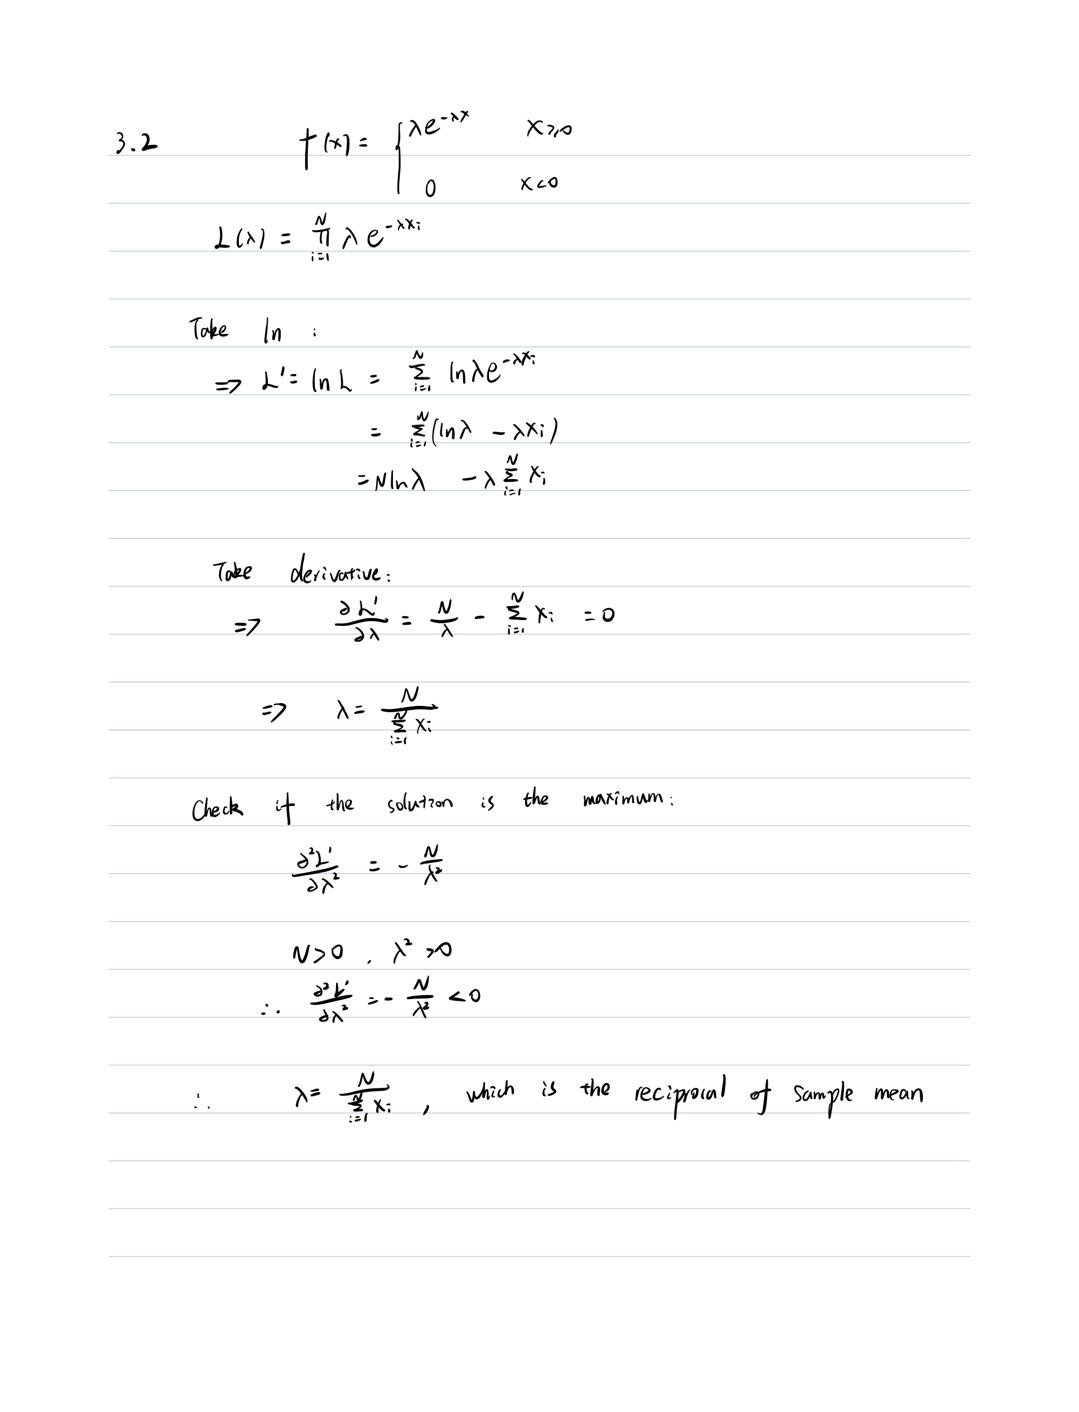

In [16]:
Image('3_2.jpg')

# Q4

## Case 1

In [17]:
seed_grid = np.arange(1,1001)
coverage = 0

for i in seed_grid:
    np.random.seed(i)
    x = np.random.normal(0,1,4)
    mu = x.mean()
    std = x.std()
    up = mu+1.6449*std/np.sqrt(4)
    lower = mu-1.6449*std/np.sqrt(4)
    if up>=0 and lower<=0:
        coverage += 1  
    else:
        pass
ef = coverage/len(seed_grid)
print(f'The empirical frequency of coverage is {ef}')

The empirical frequency of coverage is 0.749


## Case 2

In [18]:
seed_grid = np.arange(1,1001)
coverage = 0
width = []

for i in seed_grid:
    np.random.seed(i)
    x = np.random.normal(0,1,4)
    mu = x.mean()
    std = x.std()
    interval = t.interval(alpha=0.95, df=3, loc=mu, scale=std) 
    if interval[1]>=0 and interval[0]<=0:
        coverage += 1
    else:
        pass
    width.append(interval[1]-interval[0])
ef = coverage/len(seed_grid)
print(f'The empirical frequency of coverage is {ef}')

The empirical frequency of coverage is 0.988


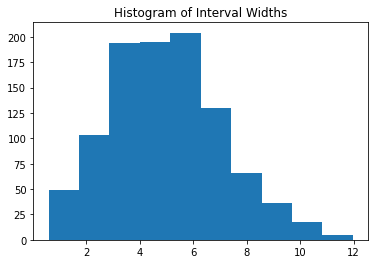

In [19]:
plt.figure()
plt.hist(width)
plt.title('Histogram of Interval Widths')
plt.show()

## Case 3

In [20]:
seed_grid = np.arange(1,1001)
coverage = 0
width = []

for i in seed_grid:
    np.random.seed(i)
    x = np.random.normal(0,1,4)
    mu = x.mean()
    std = x.std()
    interval = norm.interval(alpha=0.95, loc=mu, scale=std)
    if interval[1]>=0 and interval[0]<=0:
        coverage += 1
    else:
        pass
    width.append(interval[1]-interval[0])
ef = coverage/len(seed_grid)
print(f'The empirical frequency of coverage is {ef}')

The empirical frequency of coverage is 0.957


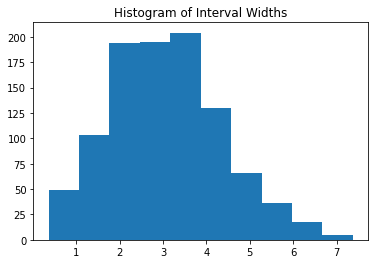

In [21]:
plt.figure()
plt.hist(width)
plt.title('Histogram of Interval Widths')
plt.show()

**Case 2 has the highest empirical frequency of coverage when exact small sample CI is computed using t-distribution. That makes sense since the sample is very small (N=4). When using approximate large-sample CI in case 3, the empirical frequency decreases.**